In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import pickle

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%config InlineBackend.figure_format='retina'

import QuantTrading.ImpactFitting as IF



## Data Acquisition
Data initilialised in this section are all for all dates, all stocks

In [4]:
def load_from_pickle(filename):
    path = '../pkl_dump/'
    with open(path + filename, 'rb') as f:
        return pickle.load(f)

# Load data
traded_volume_df = load_from_pickle('traded_volume_df.pkl')
px_df = load_from_pickle('px_df.pkl')
daily_stock_info_df = load_from_pickle('daily_stock_info_df.pkl')
monthly_scaling_factor = load_from_pickle('monthly_scaling_factor.pkl')
stocks = traded_volume_df.reset_index()["stock"].unique()

## Price Impact (DODGY!!)

There are several impact model to choose from: 1) naive OW 2) AFS 3) Ridge-style OW.

**DODGY!!!** R2 is maxed at a max half-life!! Bug or Why?

1) OW - `model_type = "linear"`

In [79]:
in_sample_month = 3
# half_life_list = np.arange(10800, 14401, 1800)
half_life_list = [900, 1800, 3600, 7200, 14400]
rsq_data = np.zeros((len(stocks), len(half_life_list)))

reg_summary_list = []
for i in range(len(half_life_list)):
    model_type = "linear"
    impact_px_df = IF.get_impact_state(traded_volume_df, monthly_scaling_factor, 
                                    half_life_list[i], model_type)
    reg_summary_temp = IF.get_regression_results(impact_px_df, px_df, 
                                            in_sample_month, explanation_horizon_periods=6)
    reg_summary_temp["half_life"] = half_life_list[i]
    
    reg_summary_list.append(reg_summary_temp[["beta_estimate", "alpha_estimate", "is_rsq", "oos_rsq", "half_life"]])

rsq_table = pd.concat(reg_summary_list).reset_index()

/Users/kelvinwu/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4 MSc Maths and Finance/Quant Trading and Price Impact/QuantTradingProject/QuantTrading/ImpactFitting.py:28: FutureWarning: Support for axis=1 in DataFrame.ewm is deprecated and will be removed in a future version. Use obj.T.ewm(...) instead
  cum_impact = pre_ewm.ewm(alpha=1-decay_factor, adjust=False, axis="columns").mean()  # Across columns
/Users/kelvinwu/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4 MSc Maths and Finance/Quant Trading and Price Impact/QuantTradingProject/QuantTrading/ImpactFitting.py:28: FutureWarning: Support for axis=1 in DataFrame.ewm is deprecated and will be removed in a future version. Use obj.T.ewm(...) instead
  cum_impact = pre_ewm.ewm(alpha=1-decay_factor, adjust=False, axis="columns").mean()  # Across columns
/Users/kelvinwu/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4 MSc Maths and Finance/Quant Trading and Price Impact/QuantTradingProject/QuantTrading/I

2) AFS - `model_type = "sqrt"`

In [82]:
in_sample_month = 3
# half_life_list = np.arange(10800, 14401, 1800)
half_life_list = [900, 1800, 3600, 7200, 14400]
rsq_data = np.zeros((len(stocks), len(half_life_list)))

reg_summary_list = []
for i in range(len(half_life_list)):
    model_type = "sqrt"
    impact_px_df = IF.get_impact_state(traded_volume_df, monthly_scaling_factor, 
                                    half_life_list[i], model_type)
    reg_summary_temp = IF.get_regression_results(impact_px_df, px_df, 
                                            in_sample_month, explanation_horizon_periods=6)
    reg_summary_temp["half_life"] = half_life_list[i]
    
    reg_summary_list.append(reg_summary_temp[["beta_estimate", "alpha_estimate", "is_rsq", "oos_rsq", "half_life"]])

rsq_table = pd.concat(reg_summary_list).reset_index()

/Users/kelvinwu/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4 MSc Maths and Finance/Quant Trading and Price Impact/QuantTradingProject/QuantTrading/ImpactFitting.py:28: FutureWarning: Support for axis=1 in DataFrame.ewm is deprecated and will be removed in a future version. Use obj.T.ewm(...) instead
  cum_impact = pre_ewm.ewm(alpha=1-decay_factor, adjust=False, axis="columns").mean()  # Across columns
/Users/kelvinwu/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4 MSc Maths and Finance/Quant Trading and Price Impact/QuantTradingProject/QuantTrading/ImpactFitting.py:28: FutureWarning: Support for axis=1 in DataFrame.ewm is deprecated and will be removed in a future version. Use obj.T.ewm(...) instead
  cum_impact = pre_ewm.ewm(alpha=1-decay_factor, adjust=False, axis="columns").mean()  # Across columns
/Users/kelvinwu/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4 MSc Maths and Finance/Quant Trading and Price Impact/QuantTradingProject/QuantTrading/I

In [84]:
rsq_table.groupby('stock').max('is_rsq')

,beta_estimate,alpha_estimate,is_rsq,oos_rsq,half_life
stock,,,,,
A,8.345067,0.000342,0.065647,0.077054,14400
AAL,12.089563,0.000553,0.134113,0.151838,14400
AAP,7.998700,0.000463,0.090065,0.052375,14400
AAPL,13.809459,0.000380,0.177907,-0.005738,14400
ABBV,8.797581,0.000385,0.082840,0.074765,14400
ABC,7.035779,0.000438,0.063200,0.078649,14400
ABMD,10.873694,0.000604,0.120866,0.078202,14400
ABT,7.212452,0.000362,0.060165,0.065896,14400
ACN,7.115315,0.000331,0.051081,-0.200057,14400


Some sanity check

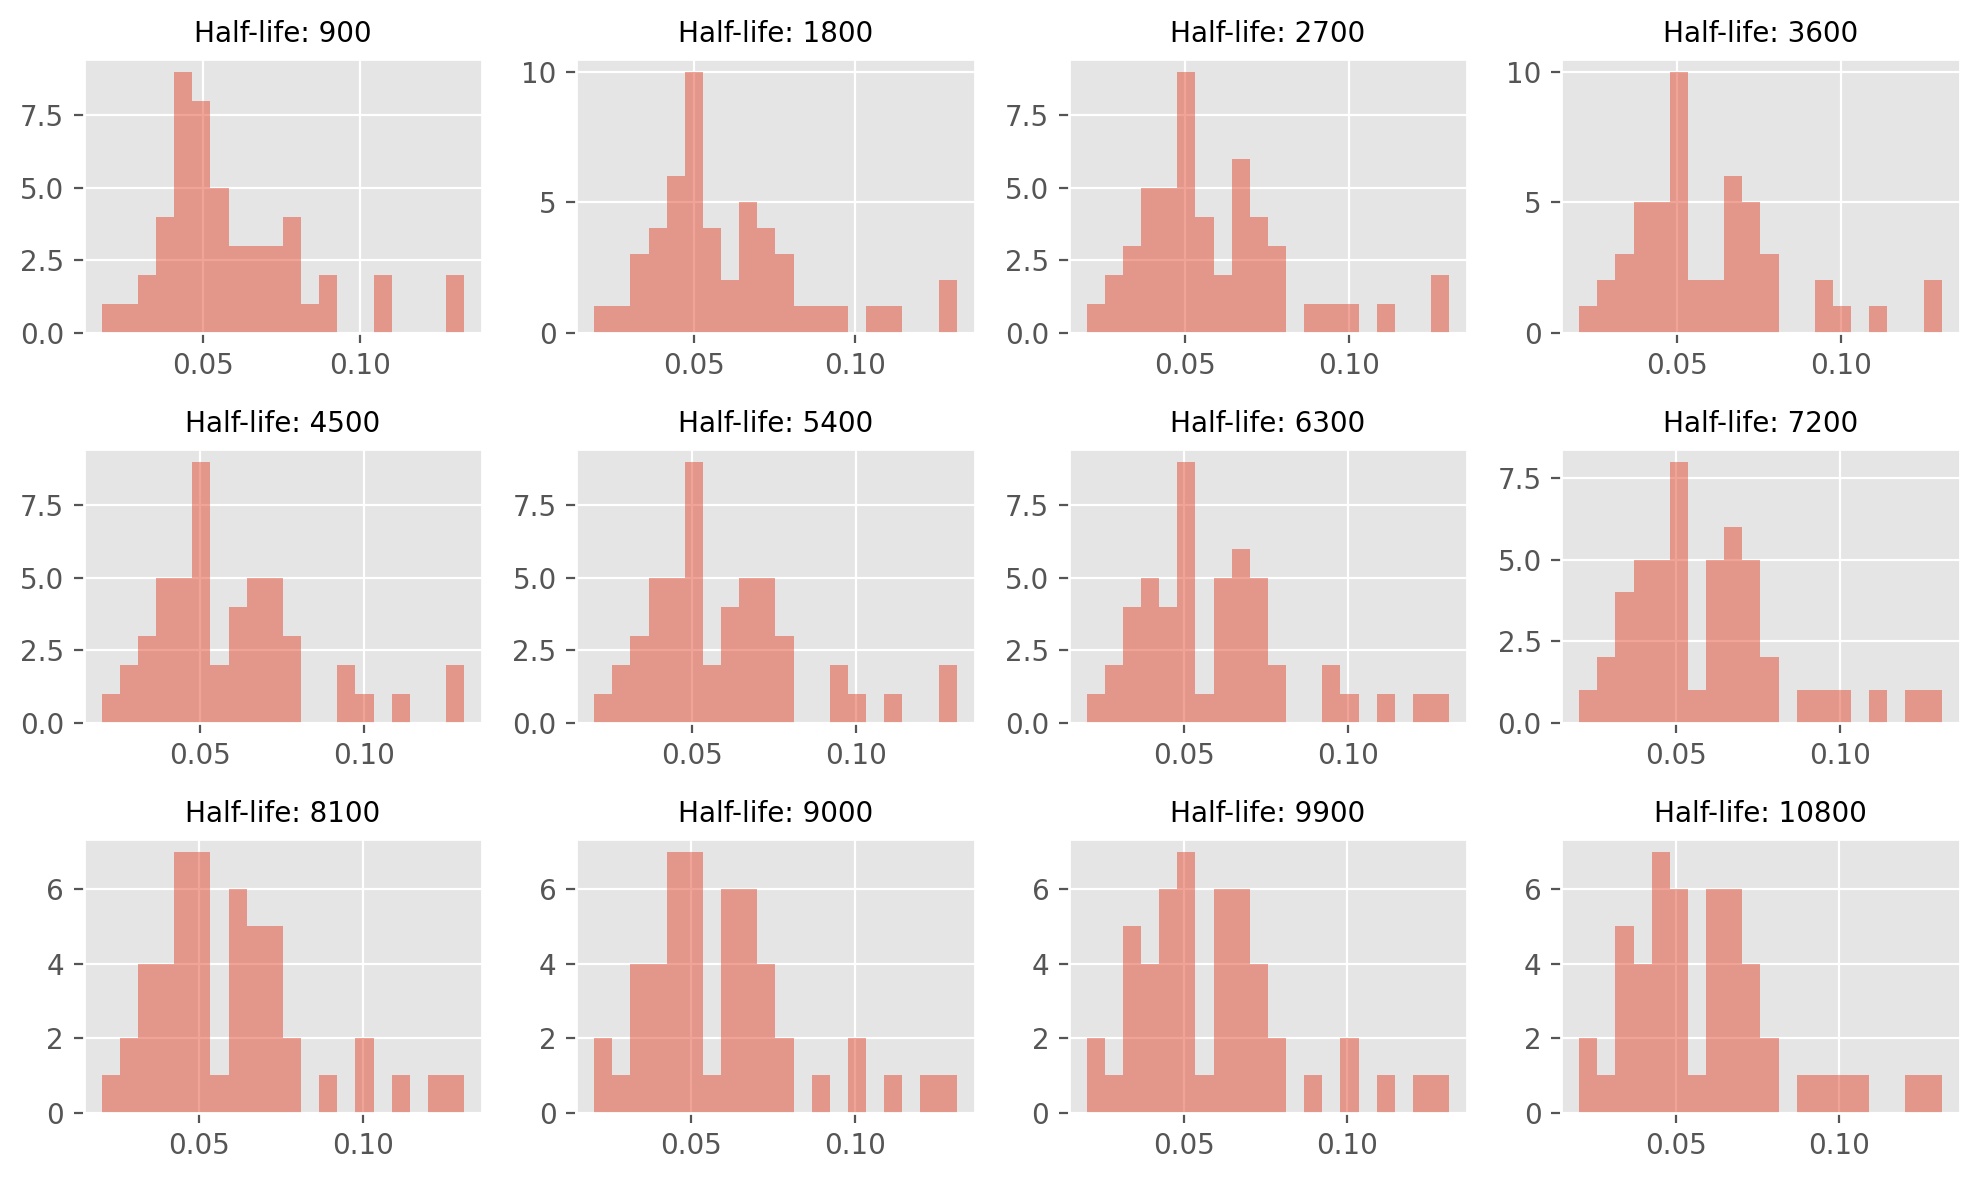

In [64]:
fig, ax = plt.subplots(3, 4, figsize=(10, 6))
for i in range(12):
    half_life = half_life_list[i]
    rsq_table_temp = rsq_table[rsq_table["half_life"] == half_life]
    rsq_table_temp["is_rsq"].hist(ax=ax[i//4, i%4], bins=20, alpha=0.5)
    # set title
    ax[i//4, i%4].set_title(f"Half-life: {half_life}", fontsize=10, color='black')

plt.tight_layout()

In [41]:
# find the best half life to max "is_rsq"
# while keeping all other columns
impact_coef = rsq_table.reset_index().groupby('stock')

5040.0

## Synthetic Alpha (Done)

In [123]:
def synthetic_alpha_coef(corr, px_df_stock, ret_stock, alpha_horizon=6):
    ret_var = ret_stock.values.var()
    px_minus2 = (px_df_stock ** -2).values.mean()
    
    x = corr ** 2
    y = corr * np.sqrt(1 - corr ** 2) * np.sqrt(ret_var / alpha_horizon / px_minus2)
    return x, y

def diagnosis(returns_df):
    correlation = returns_df.corr().iloc[0,1]
    actual_variance = returns_df["actual"].var()
    synthetic_variance = returns_df["synthetic"].var()
    
    return correlation, actual_variance, synthetic_variance

def synthetic_alpha(corr, px_df, stock, alpha_horizon):
    px_df = px_df.loc[stock]
    ret = px_df.pct_change(alpha_horizon, axis="columns").dropna(axis=1)
    
    x, y = synthetic_alpha_coef(corr, px_df, ret, alpha_horizon)

    np.random.seed(42)
    
    returns = px_df.T.pct_change(alpha_horizon, axis=0).iloc[alpha_horizon:]
    returns.index.name = "time"

    px_changes = px_df.T.diff(alpha_horizon, axis=0).iloc[alpha_horizon:]
    W_diffs = np.random.normal(loc=0, scale=1.0, size=(px_df.shape[0], px_df.shape[1]-1))
    Ws = np.concatenate((np.zeros((W_diffs.shape[0], 1)), W_diffs.cumsum(axis=1)), axis=1).T
    W_h_diffs = Ws[alpha_horizon::] - Ws[:-alpha_horizon]
    px_changes = px_changes * x + W_h_diffs * y
    synthetic_returns = px_changes / (px_df.T.shift(1, axis=0))
    synthetic_returns.index.name = "time"

    returns_df = pd.DataFrame({
        "actual": returns.unstack(),
        "synthetic": synthetic_returns.unstack(),
    })
    
    print(diagnosis(returns_df))

    return returns_df

In [124]:
def get_synthetic_alpha(corr, px_df, stock, alpha_horizon=6, smooth=True):
    returns_df = synthetic_alpha(corr, px_df, stock, alpha_horizon)
    synthetic_alpha_diffs = returns_df.drop("actual", axis="columns").unstack("time")["synthetic"]
    
    synthetic_alphas = synthetic_alpha_diffs.iloc[:, ::-1].cumsum(axis="columns").iloc[:, ::-1].shift(-1, axis="columns").fillna(0)
    
    if smooth:
        return synthetic_alphas.ewm(halflife=200, axis="columns").mean()
    else:
        return synthetic_alphas

## Optimal Trading Strategy (Not started, should be very short)

## Backtesting (Barely Started)

In future versions use `cum_impacts` as input

In [168]:
def impact_adjusted_prices(pre_ewm, px_df, scaling_df, half_life, impact_coef_df, model_type):
    cum_impacts = impact_state(pre_ewm, scaling_df, half_life, model_type).T
    cum_returns = px_df.T / px_df.T.iloc[0, :] - 1
    stock_date_df = cum_returns.T.iloc[:, 0].reset_index()
    # stock_date_df["month"] = pd.to_datetime(stock_date_df["date"]).dt.month
    stock_date_df.drop(["date"], axis="columns", inplace=True)
    impact_coefficients = pd.merge(stock_date_df, impact_coef_df, on=["stock"], how="left")["beta_estimate"].values
    cum_returns -= cum_impacts * impact_coefficients
    adjusted_px_df = (px_df.T.iloc[0, :] * (cum_returns + 1)).T.reset_index()
    return adjusted_px_df


## Performance Analysis (Need plots!)